<a href="https://colab.research.google.com/github/aankitsatpathy/Uber-Data-Analysis/blob/main/Uber_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/UberDataset.csv')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.isnull().sum()

,0
START_DATE,0
END_DATE,1
CATEGORY,1
START,1
STOP,1
MILES,0
PURPOSE,503


In [ ]:
df['PURPOSE']=df['PURPOSE'].fillna("Unknown")
df.dropna(inplace=True)
df.isnull().sum()

,0
START_DATE,0
END_DATE,0
CATEGORY,0
START,0
STOP,0
MILES,0
PURPOSE,0


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


,MILES
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [ ]:
from dateutil import parser

def parse_dates(date):
    try:

      return pd.to_datetime(date, format='%d-%m-%Y %H:%M')
    except ValueError:
        try:
          return pd.to_datetime(date, format='%m/%d/%Y %H:%M')
        except ValueError:
            try:
                return parser.parse(date)

            except Exception:
                return None

df['START_DATE'] = df['START_DATE'].apply(parse_dates)
df['END_DATE'] = df['END_DATE'].apply(parse_dates)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [ ]:
df['TRAVEL_DURATION']=df['END_DATE']-df['START_DATE']
df['TRAVEL_DURATION'] = df['TRAVEL_DURATION'].dt.total_seconds()/60
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TRAVEL_DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,12.0
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [ ]:
print(df[df['TRAVEL_DURATION'] == 0])

             START_DATE            END_DATE  CATEGORY             START  \
751 2016-06-09 17:49:00 2016-06-09 17:49:00  Business  Unknown Location   
761 2016-09-16 07:08:00 2016-09-16 07:08:00  Business  Unknown Location   
798 2016-08-10 15:03:00 2016-08-10 15:03:00  Business           Karachi   
807 2016-10-13 13:02:00 2016-10-13 13:02:00  Business         Islamabad   

                 STOP  MILES  PURPOSE  TRAVEL_DURATION  
751  Unknown Location   69.1  Unknown              0.0  
761  Unknown Location    1.6  Unknown              0.0  
798           Karachi    3.6  Unknown              0.0  
807         Islamabad    0.7  Unknown              0.0  


In [ ]:
df.drop(df[df['TRAVEL_DURATION'] == 0].index, inplace=True)
df['TRAVEL_DURATION'] = df['TRAVEL_DURATION'].abs()
print(df[df['TRAVEL_DURATION'] == 0])

Empty DataFrame
Columns: [START_DATE, END_DATE, CATEGORY, START, STOP, MILES, PURPOSE, TRAVEL_DURATION]
Index: []


In [ ]:
df['AVG_SPEED']=df['MILES']/(df['TRAVEL_DURATION']/60)
df.head()
df['AVG_SPEED'].mean()

26.4997284361435

In [ ]:
import matplotlib.pyplot as plt

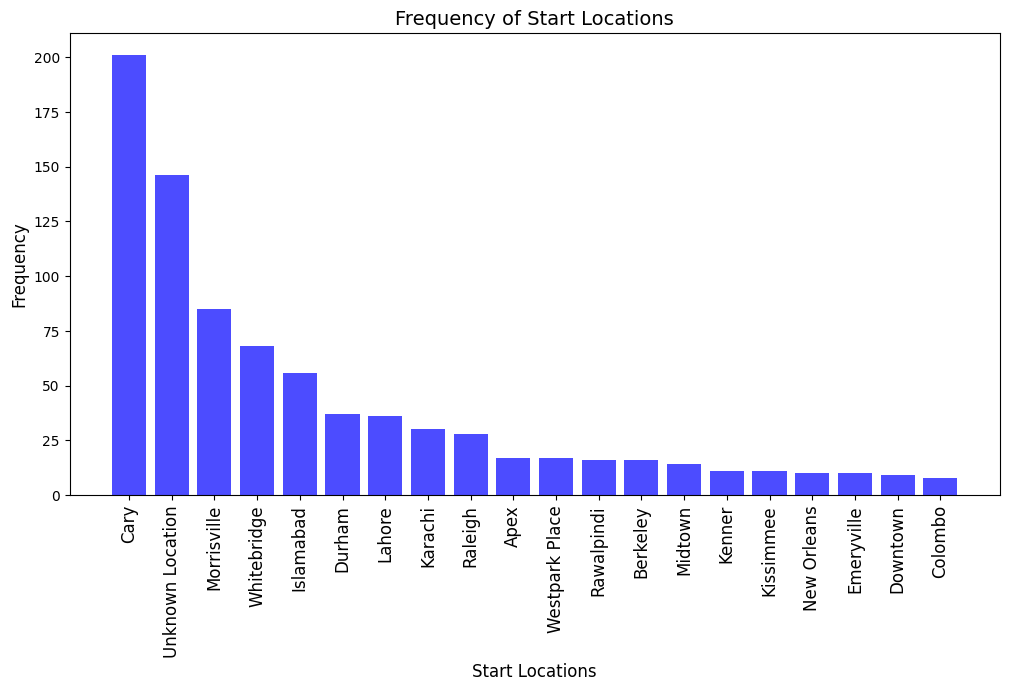

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df['START'].value_counts().head(20).index, df['START'].value_counts().head(20).values, color='blue', alpha=0.7)
plt.xlabel('Start Locations', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency of Start Locations', fontsize=14)
plt.xticks(rotation=90,fontsize=12);

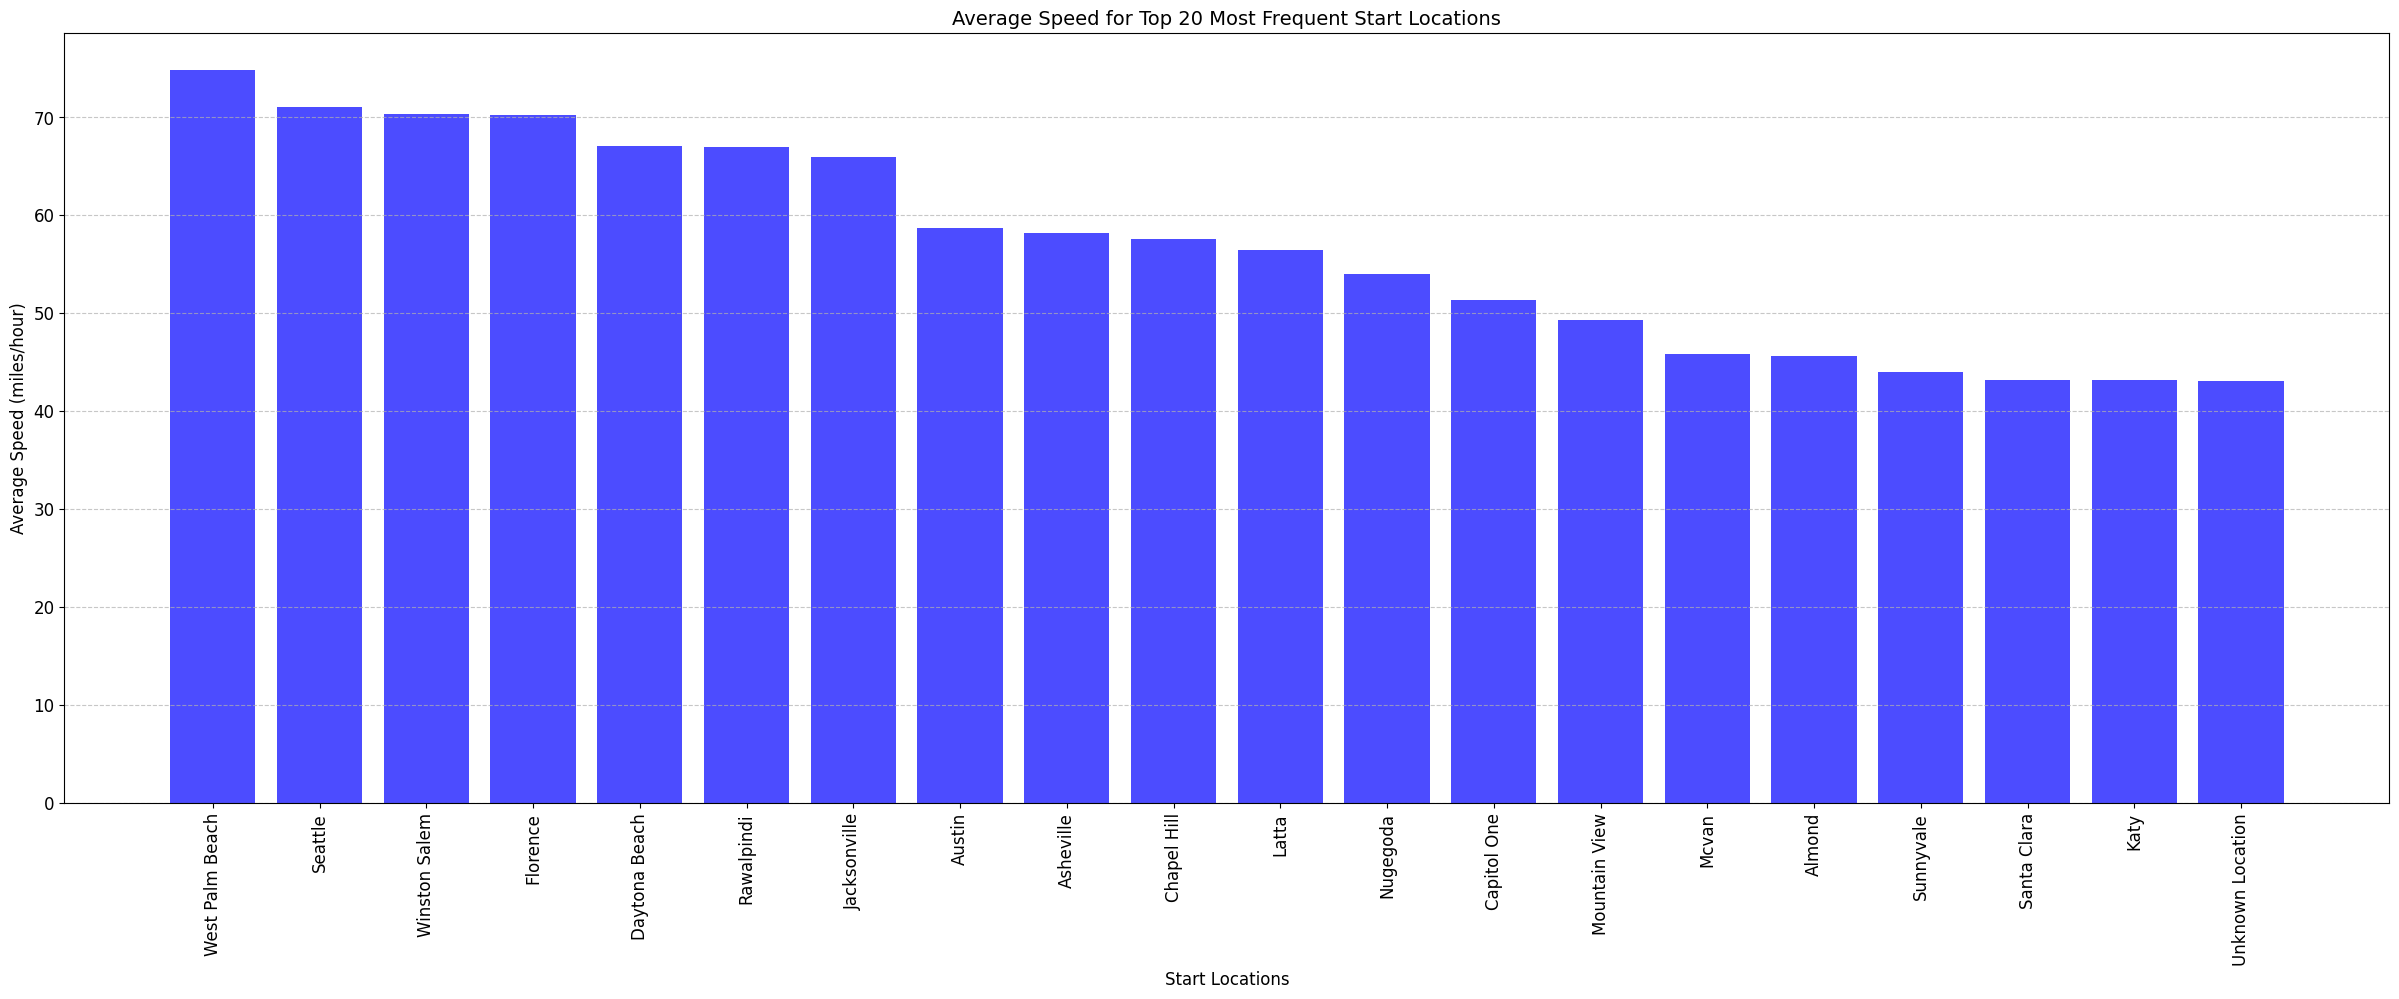

In [ ]:
avg_speed_top_20 = df.groupby('START')['AVG_SPEED'].mean().nlargest(20)
plt.figure(figsize=(30, 10))
plt.bar(avg_speed_top_20.index, avg_speed_top_20.values, color='blue', alpha=0.7, label='Avg Speed')
plt.xlabel('Start Locations', fontsize=12)
plt.ylabel('Average Speed (miles/hour)', fontsize=12)
plt.title('Average Speed for Top 20 Most Frequent Start Locations', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

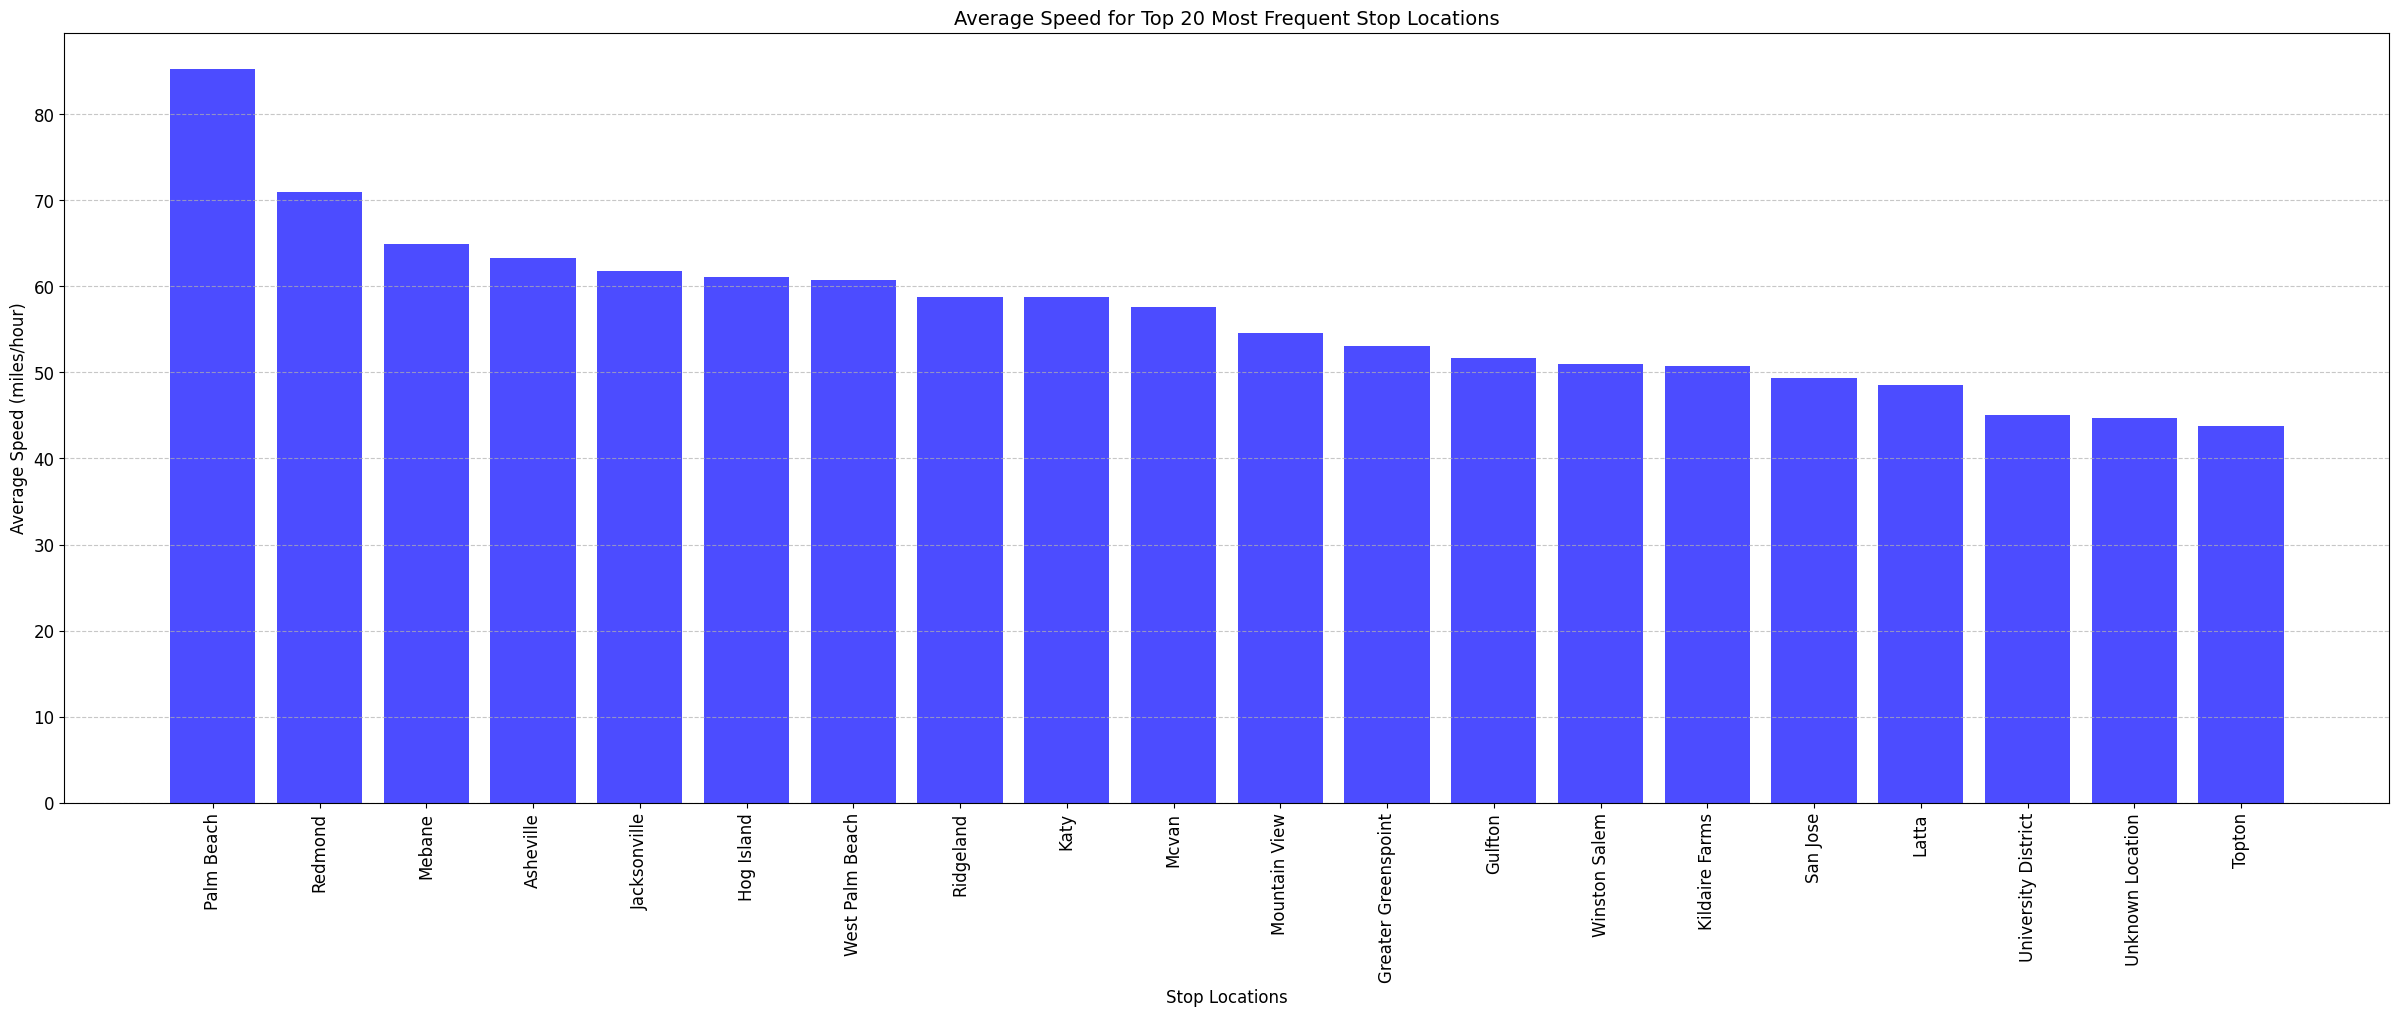

In [ ]:
avg_speed_top_20 = df.groupby('STOP')['AVG_SPEED'].mean().nlargest(20)
plt.figure(figsize=(30, 10))
plt.bar(avg_speed_top_20.index, avg_speed_top_20.values, color='blue', alpha=0.7, label='Avg Speed')
plt.xlabel('Stop Locations', fontsize=12)
plt.ylabel('Average Speed (miles/hour)', fontsize=12)
plt.title('Average Speed for Top 20 Most Frequent Stop Locations', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

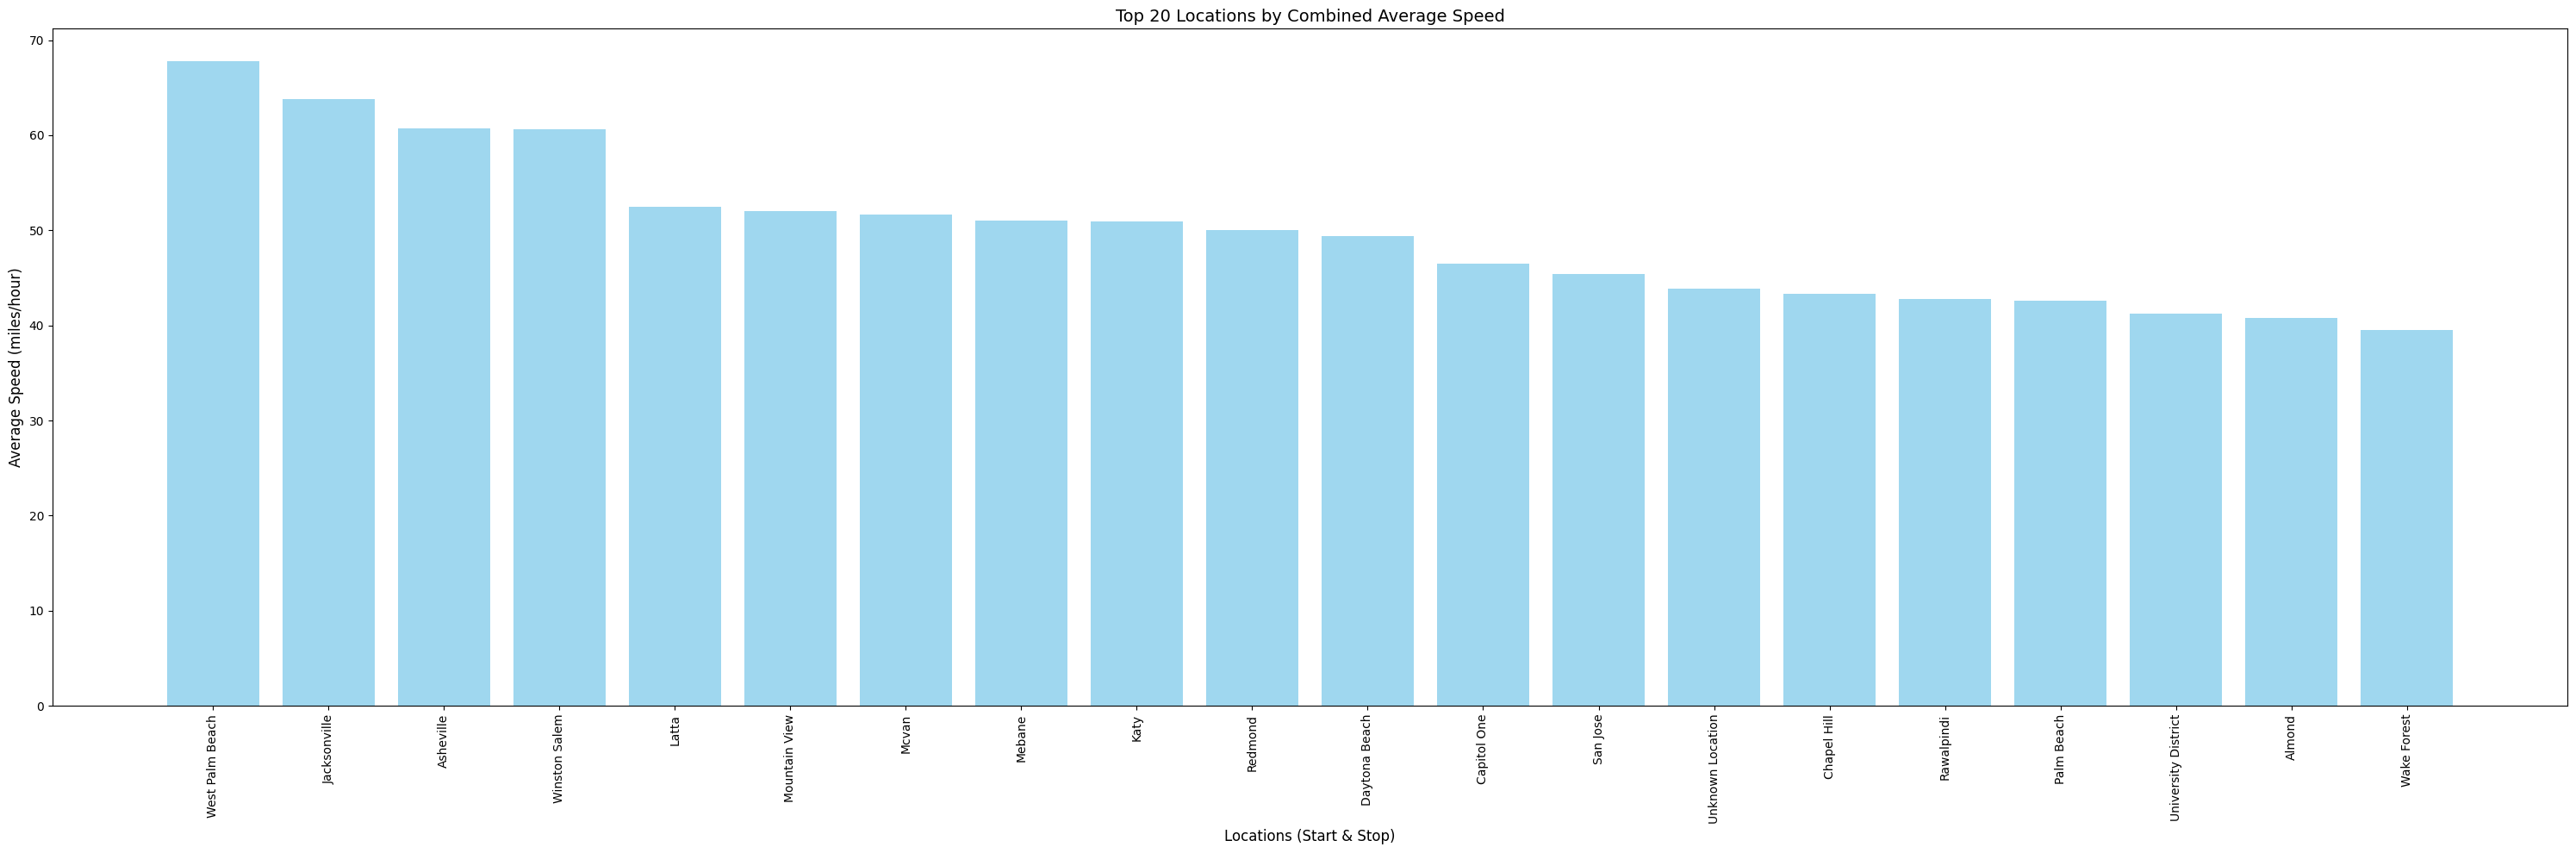

In [ ]:
start_avg_speeds = df.groupby('START')['AVG_SPEED'].mean()
stop_avg_speeds = df.groupby('STOP')['AVG_SPEED'].mean()
combined_avg_speeds = start_avg_speeds.add(stop_avg_speeds, fill_value=0) / 2
top_combined_avg_speeds = combined_avg_speeds.sort_values(ascending=False).nlargest(20)
plt.figure(figsize=(30, 10))
plt.bar(top_combined_avg_speeds.index, top_combined_avg_speeds.values, color='skyblue', alpha=0.8)
plt.xlabel('Locations (Start & Stop)', fontsize=12)
plt.ylabel('Average Speed (miles/hour)', fontsize=12)
plt.title('Top 20 Locations by Combined Average Speed', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
df['START'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Whitebridge',
       'Lake Wellingborough', 'Fayetteville Street', 'Raleigh',
       'Hazelwood', 'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill',
       'Northwoods', 'Edgehill Farms', 'Tanglewood', 'Preston',
       'Eastgate', 'East Elmhurst', 'Jackson Heights', 'Long Island City',
       'Katunayaka', 'Unknown Location', 'Colombo', 'Nugegoda',
       'Islamabad', 'Rawalpindi', 'Noorpur Shahan', 'Heritage Pines',
       'Westpark Place', 'Waverly Place', 'Wayne Ridge', 'Weston',
       'East Austin', 'West University', 'South Congress', 'The Drag',
       'Congress Ave District', 'Red River District', 'Georgian Acres',
       'North Austin', 'Coxville', 'Conven